
*The aim of the study is to compare the performance of the unsupervised model with the supervised models in detecting fraudulent transactions and conclude the best technique in detecting frauds.

*Dataset used: https://www.kaggle.com/mlg-ulb/creditcardfraud



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

## Exploratory data analysis

In [ ]:
#Importing the dataset
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observing the different feature type present in the data
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#Shape of the data set
df.shape

(284807, 31)

In [ ]:
df.describe()
#Count is same for all the columns, so we are not missing any data in any column. Hence there are no null values

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


There is not very high correlation among the Features

### Splitting the data into train & test data

In [ ]:
# Drop unnecessary columns 
#Dropping Time column as well as its an offset from initial transaction and  is in relative sense,
#we can treat it as a serial number. Hence dropping this variable.
X=df1
X=X.drop(['Class','Time'], axis = 1) 


In [ ]:
#Scling the amount comlumn
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X['scaled_amount'] = std_scaler.fit_transform(X['Amount'].values.reshape(-1,1))

X.drop(['Amount'], axis=1, inplace=True)

X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
y= df['Class']
X1=X

In [ ]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


# Unsupvervised Models

 **Feature Seclection**

**Variance Threshold - Unsupervised**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
VT1 = X1.var()
print(VT1)

V1               3.836489
V2               2.726820
V3               2.299029
V4               2.004684
V5               1.905081
V6               1.774946
V7               1.530401
V8               1.426479
V9               1.206992
V10              1.185594
V11              1.041855
V12              0.998403
V13              0.990571
V14              0.918906
V15              0.837803
V16              0.767819
V17              0.721373
V18              0.702539
V19              0.662662
V20              0.594325
V21              0.539526
V22              0.526643
V23              0.389951
V24              0.366808
V25              0.271731
V26              0.232543
V27              0.162919
V28              0.108955
Class            0.001725
scaled_amount    1.000004
dtype: float64


In [ ]:
VT1_final=VT1[VT1.values>0.4]
VT_features=list(VT1_final.index)
VT_features.append('Class')
print(VT_features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'scaled_amount', 'Class']


**Mean absolute difference - Unsupervised**

In [ ]:
mad = np.sum(np.abs(X1 -np.mean(X1, axis =0 )), axis = 0)/X1.shape[0]

In [ ]:
print(mad)

V1               1.411612
V2               0.973837
V3               1.133682
V4               1.060289
V5               0.897067
V6               0.909012
V7               0.737845
V8               0.505740
V9               0.814393
V10              0.695119
V11              0.831256
V12              0.705361
V13              0.784602
V14              0.648651
V15              0.727341
V16              0.647817
V17              0.563869
V18              0.635824
V19              0.605795
V20              0.341908
V21              0.319070
V22              0.584206
V23              0.261936
V24              0.468444
V25              0.403262
V26              0.376631
V27              0.181466
V28              0.129333
Class            0.003449
scaled_amount    0.413928
dtype: float64


<BarContainer object of 30 artists>

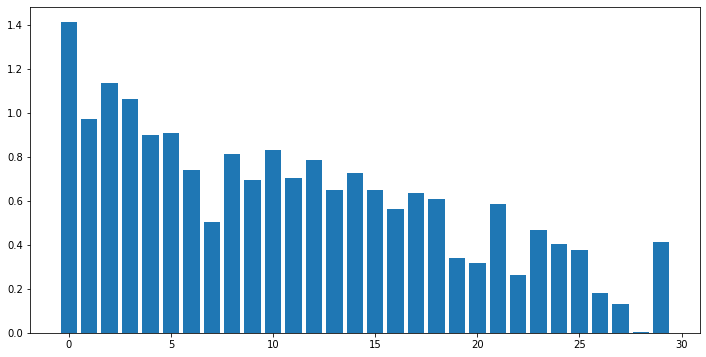

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(X1.shape[1]),mad)

In [ ]:
mad_final=mad[mad.values>0.70]
mad_features=list(mad_final.index)
mad_features.append('Class')
print(mad_features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V11', 'V12', 'V13', 'V15', 'Class']


**Extra Tree Classifier - Supervised** 

[0.01420632 0.01536508 0.03409843 0.04043065 0.01425146 0.01572387
 0.02342036 0.01531244 0.03290591 0.07568578 0.06797615 0.10760835
 0.01283824 0.12732095 0.01255885 0.06390517 0.1355497  0.04335486
 0.01599119 0.0138594  0.01601216 0.01405689 0.00956191 0.0133953
 0.01055814 0.01596257 0.01344289 0.01304389 0.01160306]


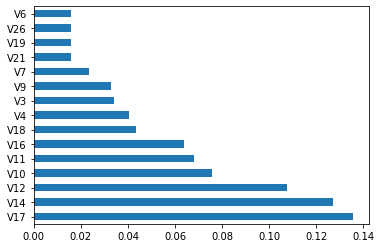

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

X2=X1.drop(['Class'], axis = 1) 
y=X1['Class']
model = ExtraTreesClassifier()
model.fit(X2, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X2.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
ft=feat_importances.nlargest(15)
ETC_features= ft.index.values.tolist()
ETC_features.append('Class')
print(ETC_features)

['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V18', 'V4', 'V3', 'V9', 'V7', 'V21', 'V19', 'V26', 'V6', 'Class']


<Figure size 432x288 with 0 Axes>

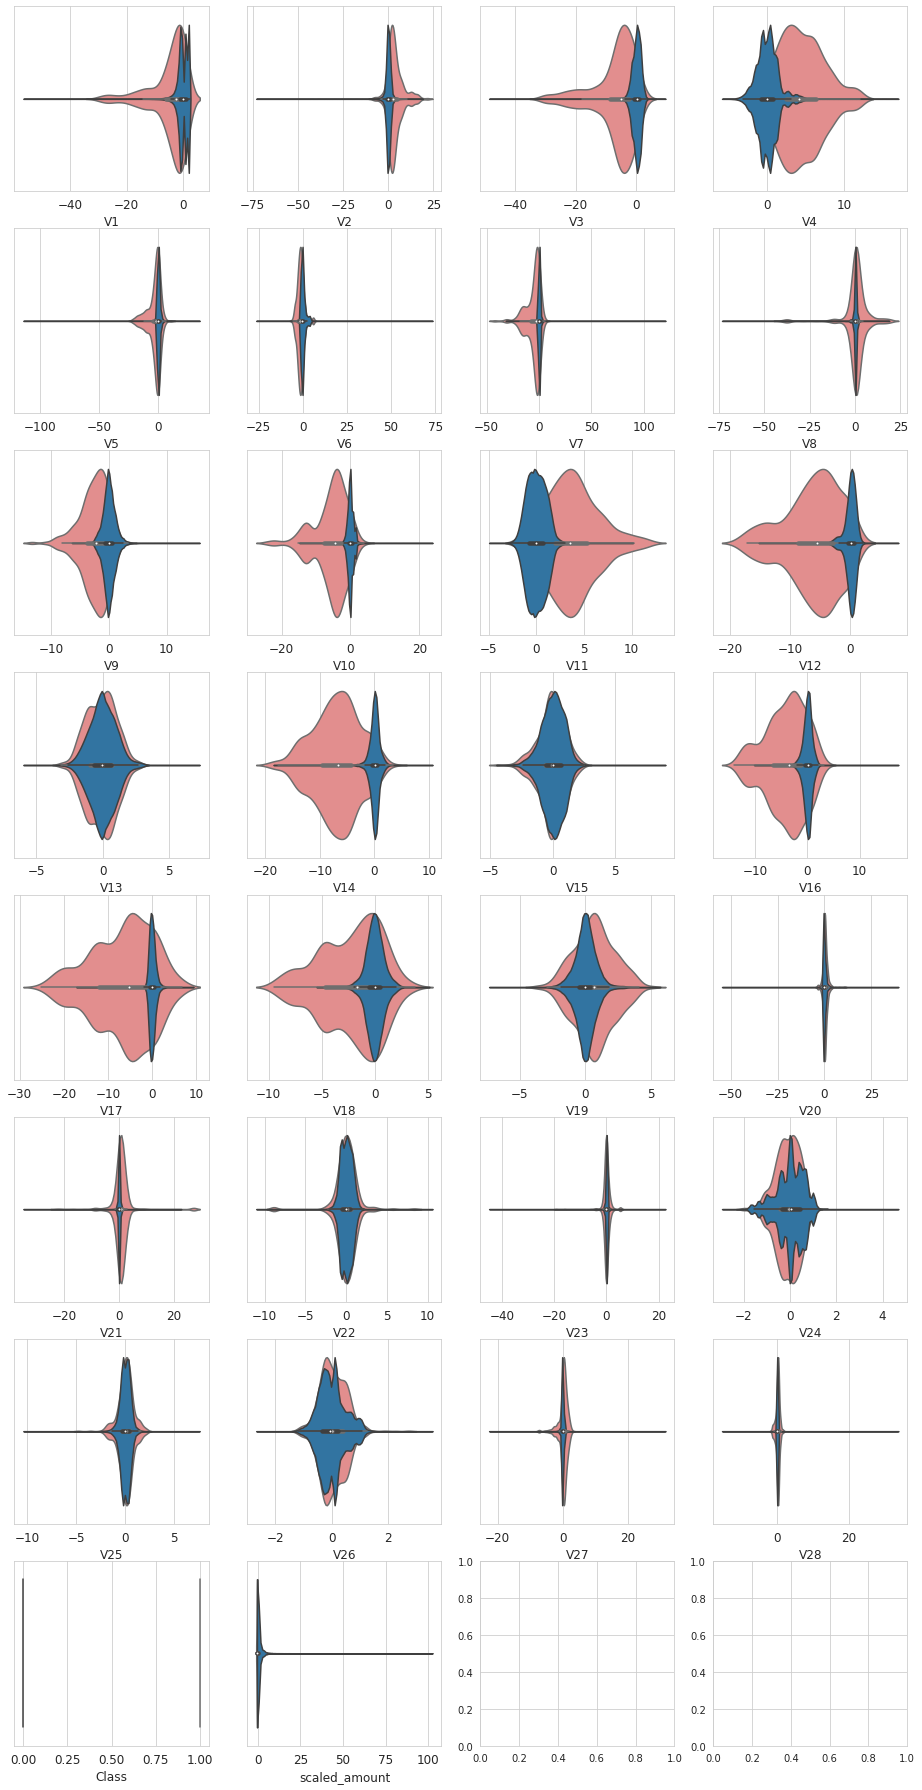

In [ ]:

var=X1.columns
j = 0
Normal = X1.loc[df['Class'] == 0]
Fraud = X1.loc[df['Class'] == 1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,32))

for col in var:
    j += 1
    plt.subplot(8,4,j)
    sns.violinplot(Fraud[col], data=Fraud, hue="Class",split=True, color='lightcoral')
    sns.violinplot(Normal[col], data=Normal, hue="Class", split=True)
    plt.xlabel(col, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();



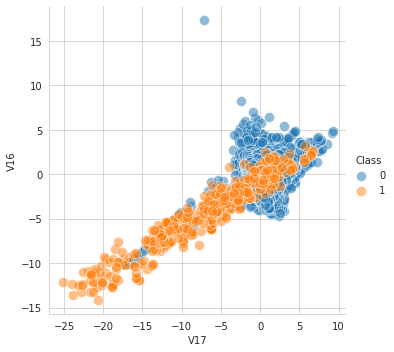

In [ ]:
g = sns.FacetGrid(X1, hue="Class", height=5)
g.map(sns.scatterplot, "V17", "V16", s=100, alpha=.5)
g.add_legend()

In [ ]:
Imp_features_EDA=['V2','V3','V4','V9','V10','V11','V12','V14','V16','V17','V18','V19','Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#20% frauds in val and all for test

X_train_normal = X_train[y_train==0]
X_train_normal = X_train_normal.drop(['Class'], axis=1)
X_train_fraud = X_train[y_train==1]
X_train_fraud = X_train_fraud.drop(['Class'], axis=1)

X_train = X_train.drop(['Class'], axis=1)
y_val = X_val['Class']
X_val_normal = X_val[y_val==0]
X_val_normal = X_val_normal.drop(['Class'], axis=1)
X_val_fraud = X_val[y_val==1]
X_val = X_val.drop(['Class'], axis=1)
X_val_fraud = X_val_fraud.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

X_train_normal.shape

(181948, 29)

In [ ]:
X_train.shape

(182276, 29)

In [ ]:
import keras
import tensorflow as tf
from keras import layers

input_dim = X_train.shape[1]

input_layer = keras.Input(shape=(input_dim, ))
encoder = Dense(25, activation="elu",
                activity_regularizer=regularizers.L1(0.0001))(input_layer)
encoder = Dense(int(20), activation="relu")(encoder)
encoder = Dense(int(10), activation="relu")(encoder)
decoder = Dense(int(20), activation='relu')(encoder)
decoder = Dense(int(25), activation="relu")(decoder)
decoder = Dense(input_dim, activation="elu")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)



In [ ]:
nb_epoch = 400
batch_size = 30
autoencoder.compile(optimizer='RMSProp', loss='MSLE', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train_normal, X_train_normal,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_val_normal, X_val_normal),
                    verbose=1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/400
6065/6065 [==============================] - 10s 1ms/step - loss: 0.0557 - accuracy: 0.5729 - val_loss: 0.0326 - val_accuracy: 0.7236
Epoch 2/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0309 - accuracy: 0.7376 - val_loss: 0.0283 - val_accuracy: 0.7606
Epoch 3/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0274 - accuracy: 0.7650 - val_loss: 0.0264 - val_accuracy: 0.7833
Epoch 4/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0263 - accuracy: 0.7777 - val_loss: 0.0259 - val_accuracy: 0.7819
Epoch 5/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0254 - accuracy: 0.7835 - val_loss: 0.0253 - val_accuracy: 0.7901
Epoch 6/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0249 - accuracy: 0.7890 - val_loss: 0.0247 - val_accuracy: 0.7952
Epoch 7/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0244 - accuracy: 0.7898 - val_loss: 0.0247 - val_a

In [ ]:
autoencoder = load_model('model.h5')

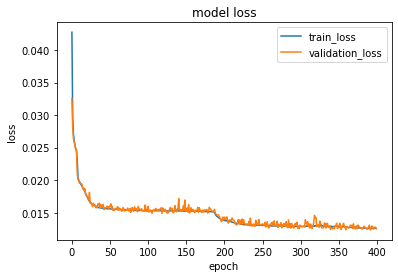

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right');

In [ ]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.groupby('true_class').describe()

reconstruction_error                                                                           
                          count       mean        std       min       25%       50%        75%         max
true_class                                                                                                
0                       56875.0   0.400386   2.640651  0.022710  0.113398  0.167138   0.269395  244.473861
1                          87.0  22.006456  30.387272  0.090309  2.712294  9.280624  24.184322  124.492308

Best Threshold=0.763530, G-Mean=0.891


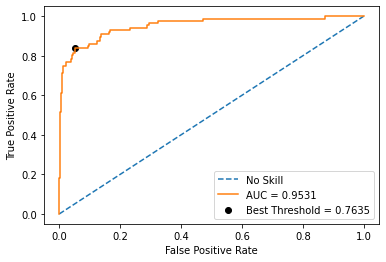

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
# calculate the g-mean for each threshold
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold = %0.4f'% thresholds[ix])
pyplot.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
threshold = thresholds[ix]

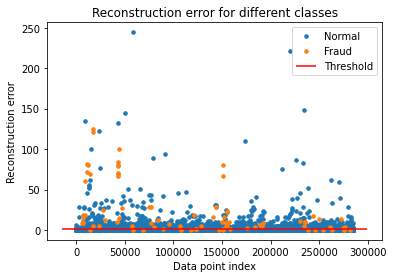

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

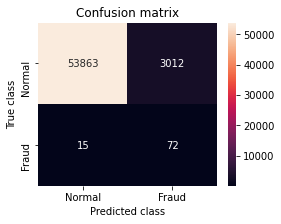

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(4, 3))
LABELS = ["Normal", "Fraud"]
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
TP = conf_matrix[0,0] # true positive 
TN = conf_matrix[1,1] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [ ]:
print(conf_matrix)

[[53863  3012]
 [   15    72]]


In [ ]:
#Precision
Precision= TP / float(TP + FP)
print(Precision)

0.9470417582417583


In [ ]:
Recall = TP/(TP+FN)
print(Recall)

0.9997215932291473


In [ ]:
F1Score = 2*(Precision*Recall)/(Precision + Recall)
print(F1Score)

0.9726689119030637


In [ ]:
Accuracy = (TP+TN)/ float (TP+FP+FN+TN)
print(Accuracy)

0.9468593097152488


**Variance Threshold**

In [ ]:
X2=df_norm[VT_features]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#20% frauds in val and all for test

X_train_normal = X_train[y_train==0]
X_train_normal = X_train_normal.drop(['Class'], axis=1)
X_train_fraud = X_train[y_train==1]
X_train_fraud = X_train_fraud.drop(['Class'], axis=1)

X_train = X_train.drop(['Class'], axis=1)
y_val = X_val['Class']
X_val_normal = X_val[y_val==0]
X_val_normal = X_val_normal.drop(['Class'], axis=1)
X_val_fraud = X_val[y_val==1]
X_val = X_val.drop(['Class'], axis=1)
X_val_fraud = X_val_fraud.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

X_train_normal.shape

(181948, 23)

In [ ]:
X_train.shape

(182276, 23)

In [ ]:
# 1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7
import keras
import tensorflow as tf
from keras import layers

input_dim = X_train.shape[1]

input_layer = keras.Input(shape=(input_dim, ))
encoder = Dense(25, activation="elu",
                activity_regularizer=regularizers.L1(0.0001))(input_layer)
encoder = Dense(int(20), activation="relu")(encoder)
encoder = Dense(int(10), activation="relu")(encoder)
decoder = Dense(int(20), activation='relu')(encoder)
decoder = Dense(int(25), activation="relu")(decoder)
decoder = Dense(input_dim, activation="elu")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)



In [ ]:
nb_epoch = 400
batch_size = 30
autoencoder.compile(optimizer='RMSProp', loss='MSLE', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train_normal, X_train_normal,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_val_normal, X_val_normal),
                    verbose=1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/400
6065/6065 [==============================] - 10s 2ms/step - loss: 0.0647 - accuracy: 0.5460 - val_loss: 0.0356 - val_accuracy: 0.7134
Epoch 2/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0337 - accuracy: 0.7227 - val_loss: 0.0306 - val_accuracy: 0.7457
Epoch 3/400
6065/6065 [==============================] - 9s 2ms/step - loss: 0.0292 - accuracy: 0.7514 - val_loss: 0.0272 - val_accuracy: 0.7601
Epoch 4/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0267 - accuracy: 0.7668 - val_loss: 0.0264 - val_accuracy: 0.7653
Epoch 5/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0257 - accuracy: 0.7717 - val_loss: 0.0251 - val_accuracy: 0.7728
Epoch 6/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0246 - accuracy: 0.7765 - val_loss: 0.0241 - val_accuracy: 0.7758
Epoch 7/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0237 - accuracy: 0.7788 - val_loss: 0.0236 - val_a

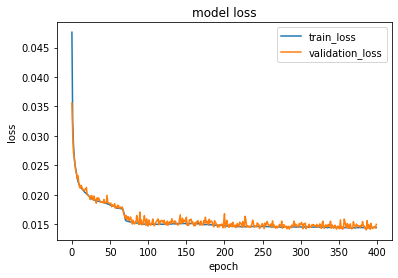

In [ ]:
autoencoder = load_model('model.h5')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right');

In [ ]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.groupby('true_class').describe()

reconstruction_error                                                                            
                          count       mean        std       min       25%        50%        75%         max
true_class                                                                                                 
0                       56875.0   0.471901   3.789391  0.020944  0.080468   0.155036   0.313162  565.342889
1                          87.0  27.005077  36.526294  0.131774  5.020316  11.574485  29.074338  149.976021

Best Threshold=0.836912, G-Mean=0.885


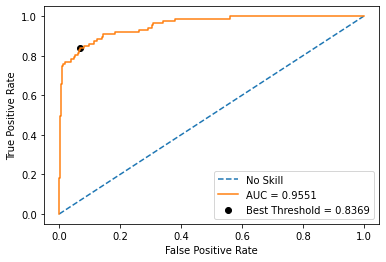

In [ ]:

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
# calculate the g-mean for each threshold
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold = %0.4f'% thresholds[ix])
pyplot.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
threshold=thresholds[ix]

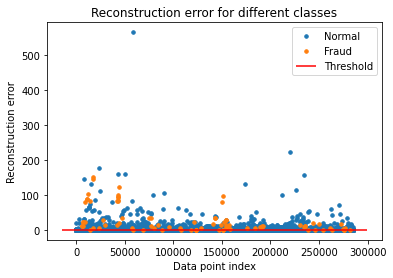

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

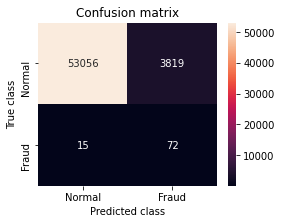

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(4, 3))
LABELS = ["Normal", "Fraud"]
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
TP = conf_matrix[0,0] # true positive 
TN = conf_matrix[1,1] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives
print(conf_matrix)
#Precision
Precision= TP / float(TP + FP)
print('Precision: ', Precision)
Recall = TP/(TP+FN)
print('Recall: ', Recall)
F1Score = 2*(Precision*Recall)/(Precision + Recall)
print('F1Score: ', F1Score)
Accuracy = (TP+TN)/ float (TP+FP+FN+TN)
print('Accuracy: ', Accuracy)

[[53056  3819]
 [   15    72]]
Precision:  0.9328527472527472
Recall:  0.9997173597633359
F1Score:  0.9651283357284484
Accuracy:  0.93269197008532


**MAD Features**

In [ ]:

X3=df_norm[mad_features].copy()
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#20% frauds in val and all for test

X_train_normal = X_train[y_train==0]
X_train_normal = X_train_normal.drop(['Class'], axis=1)
X_train_fraud = X_train[y_train==1]
X_train_fraud = X_train_fraud.drop(['Class'], axis=1)

X_train = X_train.drop(['Class'], axis=1)
y_val = X_val['Class']
X_val_normal = X_val[y_val==0]
X_val_normal = X_val_normal.drop(['Class'], axis=1)
X_val_fraud = X_val[y_val==1]
X_val = X_val.drop(['Class'], axis=1)
X_val_fraud = X_val_fraud.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

X_train_normal.shape

(181948, 12)

In [ ]:
# 1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7
import keras
import tensorflow as tf
from keras import layers

input_dim = X_train.shape[1]

input_layer = keras.Input(shape=(input_dim, ))
encoder = Dense(25, activation="elu",
                activity_regularizer=regularizers.L1(0.0001))(input_layer)
encoder = Dense(int(20), activation="relu")(encoder)
encoder = Dense(int(10), activation="relu")(encoder)
decoder = Dense(int(20), activation='relu')(encoder)
decoder = Dense(int(25), activation="relu")(decoder)
decoder = Dense(input_dim, activation="elu")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)



In [ ]:
nb_epoch = 400
batch_size = 30
autoencoder.compile(optimizer='RMSProp', loss='MSLE', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model3.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train_normal, X_train_normal,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_val_normal, X_val_normal),
                    verbose=1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/400
6065/6065 [==============================] - 10s 1ms/step - loss: 0.0407 - accuracy: 0.7148 - val_loss: 0.0070 - val_accuracy: 0.8892
Epoch 2/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0058 - accuracy: 0.8962 - val_loss: 0.0030 - val_accuracy: 0.9304
Epoch 3/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0033 - accuracy: 0.9240 - val_loss: 0.0027 - val_accuracy: 0.9299
Epoch 4/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0026 - accuracy: 0.9353 - val_loss: 0.0025 - val_accuracy: 0.9340
Epoch 5/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0023 - accuracy: 0.9385 - val_loss: 0.0028 - val_accuracy: 0.9196
Epoch 6/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0022 - accuracy: 0.9401 - val_loss: 0.0019 - val_accuracy: 0.9479
Epoch 7/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0020 - accuracy: 0.9429 - val_loss: 0.0025 - val_a

In [ ]:
autoencoder = load_model('model3.h5')

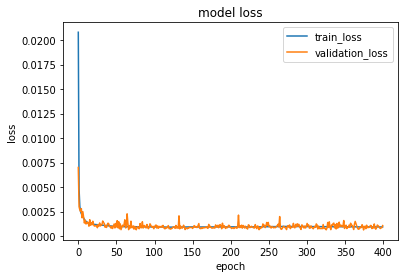

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right');

In [ ]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.groupby('true_class').describe()

reconstruction_error                                                                          
                          count       mean       std       min       25%       50%        75%         max
true_class                                                                                               
0                       56875.0   0.810957   4.91431  0.000761  0.154978  0.326813   0.702758  504.551012
1                          87.0  24.116740  43.51714  0.066503  2.013105  7.153408  17.527438  228.635230

Best Threshold=1.821259, G-Mean=0.853


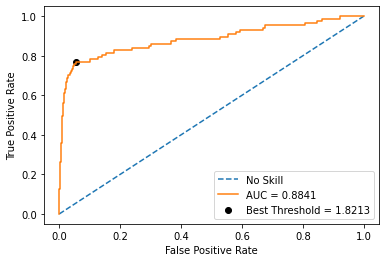

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
# calculate the g-mean for each threshold
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold = %0.4f'% thresholds[ix])
pyplot.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
threshold= thresholds[ix]

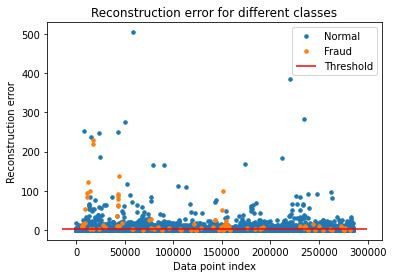

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

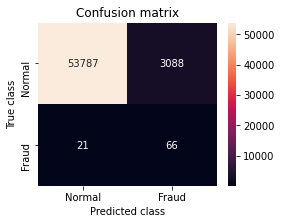

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(4, 3))
LABELS = ["Normal", "Fraud"]
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
TP = conf_matrix[0,0] # true positive 
TN = conf_matrix[1,1] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives
print(conf_matrix)
#Precision
Precision= TP / float(TP + FP)
print('Precision: ', Precision)
Recall = TP/(TP+FN)
print('Recall: ', Recall)
F1Score = 2*(Precision*Recall)/(Precision + Recall)
print('F1Score: ', F1Score)
Accuracy = (TP+TN)/ float (TP+FP+FN+TN)
print('Accuracy: ', Accuracy)

[[53787  3088]
 [   21    66]]
Precision:  0.9457054945054945
Recall:  0.9996097234611954
F1Score:  0.971910772205307
Accuracy:  0.9454197535198905


**ETC_features**

In [ ]:

X4=df_norm[ETC_features].copy()
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#20% frauds in val and all for test

X_train_normal = X_train[y_train==0]
X_train_normal = X_train_normal.drop(['Class'], axis=1)
X_train_fraud = X_train[y_train==1]
X_train_fraud = X_train_fraud.drop(['Class'], axis=1)

X_train = X_train.drop(['Class'], axis=1)
y_val = X_val['Class']
X_val_normal = X_val[y_val==0]
X_val_normal = X_val_normal.drop(['Class'], axis=1)
X_val_fraud = X_val[y_val==1]
X_val = X_val.drop(['Class'], axis=1)
X_val_fraud = X_val_fraud.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

X_train_normal.shape

(181948, 15)

In [ ]:
# 1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7
import keras
import tensorflow as tf
from keras import layers

input_dim = X_train.shape[1]

input_layer = keras.Input(shape=(input_dim, ))
encoder = Dense(25, activation="elu",
                activity_regularizer=regularizers.L1(0.0001))(input_layer)
encoder = Dense(int(20), activation="relu")(encoder)
encoder = Dense(int(10), activation="relu")(encoder)
decoder = Dense(int(20), activation='relu')(encoder)
decoder = Dense(int(25), activation="relu")(decoder)
decoder = Dense(input_dim, activation="elu")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)



In [ ]:
nb_epoch = 400
batch_size = 30
autoencoder.compile(optimizer='RMSProp', loss='MSLE', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model4.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train_normal, X_train_normal,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_val_normal, X_val_normal),
                    verbose=1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/400
6065/6065 [==============================] - 10s 1ms/step - loss: 0.0461 - accuracy: 0.6389 - val_loss: 0.0130 - val_accuracy: 0.8534
Epoch 2/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0122 - accuracy: 0.8547 - val_loss: 0.0104 - val_accuracy: 0.8628
Epoch 3/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0100 - accuracy: 0.8738 - val_loss: 0.0101 - val_accuracy: 0.8563
Epoch 4/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0084 - accuracy: 0.8871 - val_loss: 0.0081 - val_accuracy: 0.8899
Epoch 5/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0080 - accuracy: 0.8924 - val_loss: 0.0081 - val_accuracy: 0.8851
Epoch 6/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0075 - accuracy: 0.8960 - val_loss: 0.0089 - val_accuracy: 0.8677
Epoch 7/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0074 - accuracy: 0.8974 - val_loss: 0.0076 - val_a

In [ ]:
autoencoder = load_model('model4.h5')

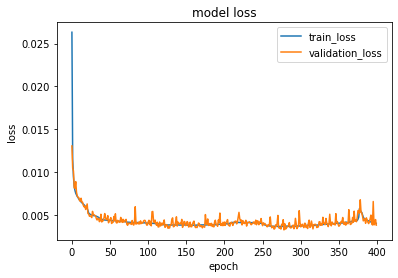

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right');

In [ ]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.groupby('true_class').describe()

reconstruction_error                                                                            
                          count       mean        std       min       25%        50%        75%         max
true_class                                                                                                 
0                       56875.0   0.427121   1.880632  0.002759  0.100388   0.220498   0.414155  136.143149
1                          87.0  33.535702  42.277508  0.145415  4.925332  16.203907  40.828033  133.855216

Best Threshold=0.819592, G-Mean=0.893


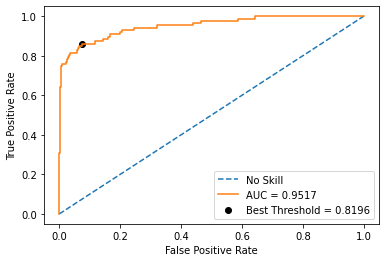

In [ ]:


fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
# calculate the g-mean for each threshold
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold = %0.4f'% thresholds[ix])
pyplot.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
threshold= thresholds[ix]

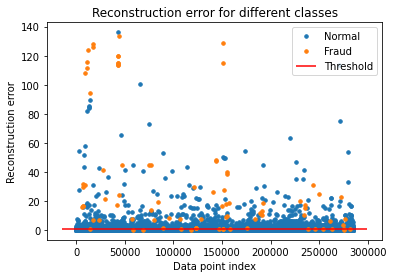

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

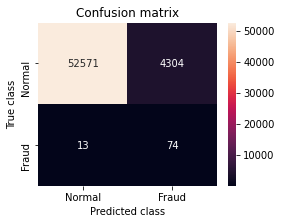

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(4, 3))
LABELS = ["Normal", "Fraud"]
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
TP = conf_matrix[0,0] # true positive 
TN = conf_matrix[1,1] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives
print(conf_matrix)
#Precision
Precision= TP / float(TP + FP)
print('Precision: ', Precision)
Recall = TP/(TP+FN)
print('Recall: ', Recall)
F1Score = 2*(Precision*Recall)/(Precision + Recall)
print('F1Score: ', F1Score)
Accuracy = (TP+TN)/ float (TP+FP+FN+TN)
print('Accuracy: ', Accuracy)

[[52571  4304]
 [   13    74]]
Precision:  0.9243252747252747
Recall:  0.999752776509965
F1Score:  0.9605605751925378
Accuracy:  0.9242126329833924


**Imp_features_EDA**

In [ ]:
X5=df_norm[Imp_features_EDA].copy()
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#20% frauds in val and all for test

X_train_normal = X_train[y_train==0]
X_train_normal = X_train_normal.drop(['Class'], axis=1)
X_train_fraud = X_train[y_train==1]
X_train_fraud = X_train_fraud.drop(['Class'], axis=1)

X_train = X_train.drop(['Class'], axis=1)
y_val = X_val['Class']
X_val_normal = X_val[y_val==0]
X_val_normal = X_val_normal.drop(['Class'], axis=1)
X_val_fraud = X_val[y_val==1]
X_val = X_val.drop(['Class'], axis=1)
X_val_fraud = X_val_fraud.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

X_train_normal.shape

(181948, 12)

In [ ]:
# 1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7
import keras
import tensorflow as tf
from keras import layers

input_dim = X_train.shape[1]

input_layer = keras.Input(shape=(input_dim, ))
encoder = Dense(25, activation="elu",
                activity_regularizer=regularizers.L1(0.0001))(input_layer)
encoder = Dense(int(20), activation="relu")(encoder)
encoder = Dense(int(10), activation="relu")(encoder)
decoder = Dense(int(20), activation='relu')(encoder)
decoder = Dense(int(25), activation="relu")(decoder)
decoder = Dense(input_dim, activation="elu")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)



In [ ]:
nb_epoch = 400
batch_size = 30
autoencoder.compile(optimizer='RMSProp', loss='MSLE', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model5.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train_normal, X_train_normal,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_val_normal, X_val_normal),
                    verbose=1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/400
6065/6065 [==============================] - 11s 2ms/step - loss: 0.0510 - accuracy: 0.6451 - val_loss: 0.0196 - val_accuracy: 0.8411
Epoch 2/400
6065/6065 [==============================] - 9s 2ms/step - loss: 0.0198 - accuracy: 0.8365 - val_loss: 0.0187 - val_accuracy: 0.8433
Epoch 3/400
6065/6065 [==============================] - 9s 2ms/step - loss: 0.0190 - accuracy: 0.8455 - val_loss: 0.0183 - val_accuracy: 0.8590
Epoch 4/400
6065/6065 [==============================] - 9s 2ms/step - loss: 0.0185 - accuracy: 0.8512 - val_loss: 0.0179 - val_accuracy: 0.8598
Epoch 5/400
6065/6065 [==============================] - 9s 2ms/step - loss: 0.0184 - accuracy: 0.8534 - val_loss: 0.0177 - val_accuracy: 0.8565
Epoch 6/400
6065/6065 [==============================] - 9s 1ms/step - loss: 0.0182 - accuracy: 0.8550 - val_loss: 0.0183 - val_accuracy: 0.8522
Epoch 7/400
6065/6065 [==============================] - 9s 2ms/step - loss: 0.0183 - accuracy: 0.8572 - val_loss: 0.0177 - val_a

In [ ]:
autoencoder = load_model('model5.h5')

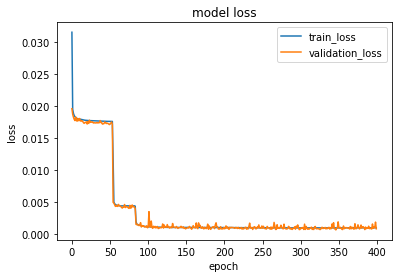

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right');

In [ ]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.groupby('true_class').describe()

reconstruction_error                                                                            
                          count       mean        std       min       25%        50%        75%         max
true_class                                                                                                 
0                       56875.0   0.579934   2.814800  0.001446  0.149921   0.320860   0.618244  386.498546
1                          87.0  32.825187  40.298495  0.245676  4.983670  15.777125  43.715918  126.986888

Best Threshold=1.236449, G-Mean=0.888


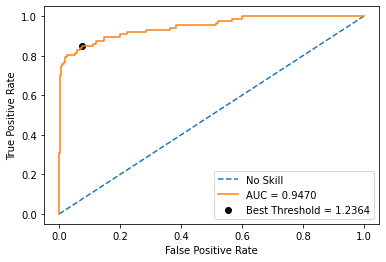

In [ ]:


fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
# calculate the g-mean for each threshold
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold = %0.4f'% thresholds[ix])
pyplot.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
threshold = thresholds[ix]

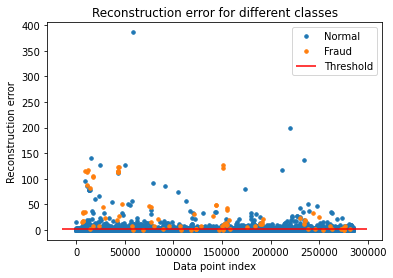

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

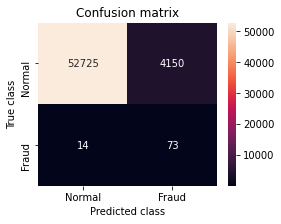

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(4, 3))
LABELS = ["Normal", "Fraud"]
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
TP = conf_matrix[0,0] # true positive 
TN = conf_matrix[1,1] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives
print(conf_matrix)
#Precision
Precision= TP / float(TP + FP)
print('Precision: ', Precision)
Recall = TP/(TP+FN)
print('Recall: ', Recall)
F1Score = 2*(Precision*Recall)/(Precision + Recall)
print('F1Score: ', F1Score)
Accuracy = (TP+TN)/ float (TP+FP+FN+TN)
print('Accuracy: ', Accuracy)

[[52725  4150]
 [   14    73]]
Precision:  0.927032967032967
Recall:  0.9997345418001858
F1Score:  0.9620121517324429
Accuracy:  0.9268986341771708


# Supervised Models

In [ ]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)

for train_index,test_index in skf.split(X_res,y_res):
    X_train, X_test = X_res.loc[train_index], X_res.loc[test_index]
    y_train, y_test = y_res.loc[train_index], y_res.loc[test_index]


df_ytrain=pd.DataFrame(y_train)
df_ytest=pd.DataFrame(y_test)

print("****Stratified K fold***")
print('Number of normal transcations in YTrain: ',len(df_ytrain[df_ytrain['Class']==0]))
print('Number of Fraud transcations in YTrain: ',len(df_ytrain[df_ytrain['Class']==1]))
print('Number of normal transcations in YTest: ',len(df_ytest[df_ytest['Class']==0]))
print('Number of Fraud transcations in YTest: ',len(df_ytest[df_ytest['Class']==1]))

****Stratified K fold***
Number of normal transcations in YTrain:  227452
Number of Fraud transcations in YTrain:  227452
Number of normal transcations in YTest:  56863
Number of Fraud transcations in YTest:  56863


In [ ]:
from sklearn.model_selection import GridSearchCV
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier()
}
Grid_list=[]


In [ ]:
#Hyper parameter tuning using GridsearchCV 

#hyper parameter tuning for LogisticRegression
grid_param = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gridsearch_lr = GridSearchCV(LogisticRegression(), grid_param, cv=5, verbose=2,n_jobs=-1) 
gridsearch_lr.fit(X_res, y_res)
lr_gs= gridsearch_lr.best_estimator_
print(gridsearch_lr.best_params_)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.0min finished


{'C': 100, 'penalty': 'l2'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.7min finished


{'n_neighbors': 2, 'p': 1}


In [ ]:
#hyper parameter tuning for Random Forest Classifier
grid_param = {"n_estimators":[10, 100], "criterion":["gini", "entropy"], "min_samples_split":list(range(2, 5, 1))}
gridsearch_dt= GridSearchCV(RandomForestClassifier(warm_start=True), grid_param, cv=5, verbose=2,n_jobs=-1) 
gridsearch_dt.fit(X_res, y_res)
rfc_gs= gridsearch_dt.best_estimator_
print(gridsearch_dt.best_params_)

classifier_tuned ={
    "logisiticRegression": lr_gs,
    "KNN": knn_gs,
    "decisionTreeClassifier": dt_gs,
    "randomForestClassifier": rfc_gs
}

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 28.3min finished


{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:

#Running the tuned models
import sklearn.metrics as metrics
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

SKF = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

for key, classifier in classifier_tuned.items():
    
    print('\n' + str(key))
    
    roc_auc = 0
    preci = 0
    recall = 0
    f1_score = 0
    
    for train_index, test_index in SKF.split(X_res, y_res):
        X_train, X_test = X_res.loc[train_index], X_res.loc[test_index]
        y_train, y_test = y_res.loc[train_index], y_res.loc[test_index]

        classifier.fit(X_train, y_train)
        
        probs = classifier.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc += metrics.auc(fpr, tpr)
        
        y_pred = classifier.predict(X_test)
        preci += metrics.precision_score(y_test, y_pred)
        recall += metrics.recall_score(y_test, y_pred)
        f1_score += metrics.f1_score(y_test, y_pred)
    
    print('Average Area under the ROC curve is: ' +str(roc_auc/5))
    print('Average Precision is: ' + str(preci/5))
    print('Average Recall is: '+ str(recall/5))
    print('Average F1 Score is: ' + str(f1_score/5))
    
        


logisiticRegression
Average Area under the ROC curve is: 0.9770971517326312
Average Precision is: 0.9620677366991988
Average Recall is: 0.9107996412429875
Average F1 Score is: 0.9357317736796735
[[54820  5054]
 [ 2043 51809]]
Accuracy: 0.94 %
Sensitivity: 96.21 %
Specificity: 91.56 %
Precision: 0.9620626903364777 %
recall: 0.9111197087737193 %
f1_score: 0.935898478074335
roc_auc:  0.937595624571338 %

KNN
Average Area under the ROC curve is: 0.9998434834602465
Average Precision is: 0.9996870680187199
Average Recall is: 1.0
Average F1 Score is: 0.9998435087390132
[[56849     0]
 [   14 56863]]
Accuracy: 1.0 %
Sensitivity: 99.98 %
Specificity: 100.0 %
Precision: 0.9997538548095012 %
recall: 1.0 %
f1_score: 0.9998769122560226
roc_auc:  0.9998768971035646 %

decisionTreeClassifier
Average Area under the ROC curve is: 0.9214937657176019
Average Precision is: 0.9676969734367245
Average Recall is: 0.8720996078293443
Average F1 Score is: 0.9174140390308947
[[55286  7189]
 [ 1577 49674]]
Accur

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/mnt/disks/user/anac

Average Area under the ROC curve is: 1.0
Average Precision is: 0.9999753803484884
Average Recall is: 1.0
Average F1 Score is: 0.9999876899423054
[[56860     0]
 [    3 56863]]
Accuracy: 1.0 %
Sensitivity: 99.99 %
Specificity: 100.0 %
Precision: 0.9999472443991138 %
recall: 1.0 %
f1_score: 0.9999736215037501
roc_auc:  0.9999736208079067 %


In short, supervised techniques like Logistic Regression and Random Forest, and Unsupervised technique i.e., Autoencoder was trained with best features selected from the European credit card fraud dataset to identify frauds. Random Forest classifier is considered to be the best model in detecting credit card frauds when compared to that of Logistic Regression and Autoencoder. 

# References

[1] “Credit Card Fraud Detection using Autoencoders in H2O | by Maneesha Rajaratne | Towards Data Science.” https://towardsdatascience.com/credit-card-fraud-detection-using-autoencoders-in-h2o-399cbb7ae4f1 (accessed Aug. 18, 2021).

[2] “A Guide on Splitting Datasets With Train_test_split Function.” https://www.bitdegree.org/learn/train-test-split (accessed Aug. 18, 2021).

[3] “Feature Selection Techniques in Machine Learning with Python | by Rahil Shaikh | Towards Data Science.” https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e (accessed Aug. 18, 2021).

[4] “TensorFlow for Hackers (Part VII) - Credit Card Fraud Detection using Autoencoders in Keras_omnispace的博客-CSDN博客.” https://blog.csdn.net/omnispace/article/details/78210190 (accessed Aug. 18, 2021).

[5] “Understand the Impact of Learning Rate on Neural Network Performance.” https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/ (accessed Aug. 18, 2021).

